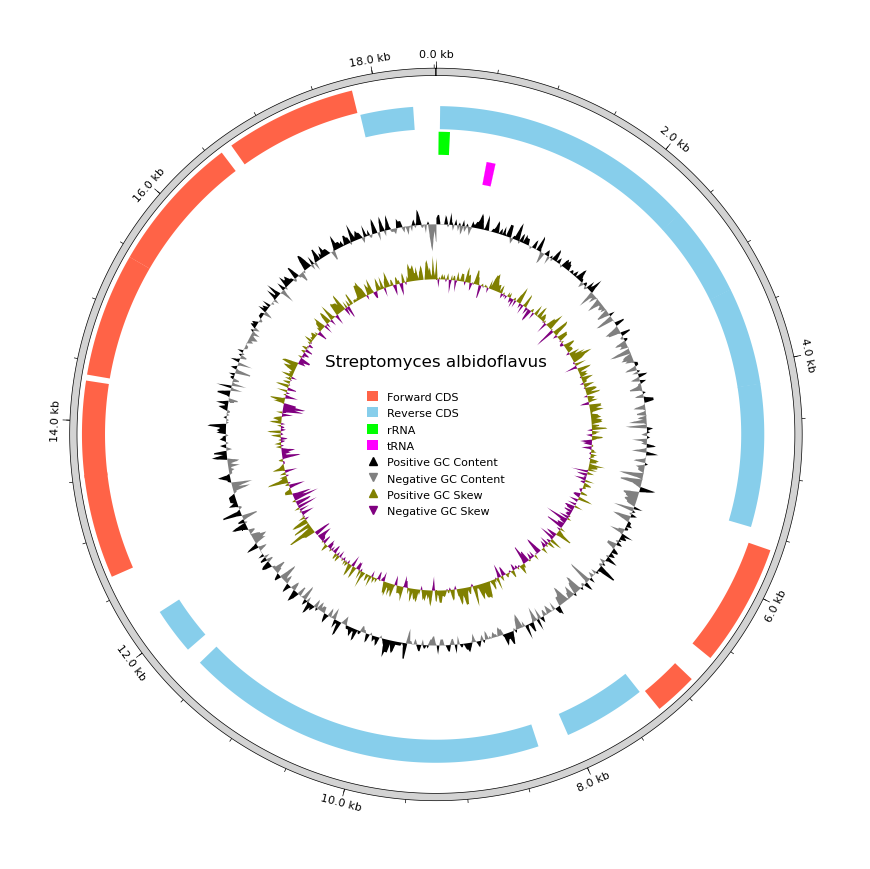

In [2]:
from pycirclize import Circos
from pycirclize.parser import Genbank
import numpy as np
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

# Load Genbank file
gbk_file = "PROKKA_11182024.gbk"
gbk = Genbank(gbk_file)

# Create Circos object
circos = Circos(sectors={gbk.name: gbk.range_size})
circos.text("Streptomyces albidoflavus", size=12, r=20)  
sector = circos.get_sector(gbk.name)

# Plot outer track with xticks
major_ticks_interval = 2000  # Major ticks every 2 kb
minor_ticks_interval = 500   # Minor ticks every 500 bp
outer_track = sector.add_track((98, 100))
outer_track.axis(fc="lightgrey")
outer_track.xticks_by_interval(
    major_ticks_interval, label_formatter=lambda v: f"{v / 10 ** 3:.1f} kb"
)
outer_track.xticks_by_interval(minor_ticks_interval, tick_length=1, show_label=False)

# Plot Forward CDS, Reverse CDS, rRNA, tRNA
f_cds_track = sector.add_track((90, 97), r_pad_ratio=0.1)
f_cds_track.genomic_features(gbk.extract_features("CDS", target_strand=1), fc="tomato")

r_cds_track = sector.add_track((83, 90), r_pad_ratio=0.1)
r_cds_track.genomic_features(gbk.extract_features("CDS", target_strand=-1), fc="skyblue")

rrna_track = sector.add_track((76, 83), r_pad_ratio=0.1)
rrna_track.genomic_features(gbk.extract_features("rRNA"), fc="lime")

trna_track = sector.add_track((69, 76), r_pad_ratio=0.1)
trna_track.genomic_features(gbk.extract_features("tRNA"), color="magenta", lw=0.1)


# Plot GC content
gc_content_track = sector.add_track((50, 65))
pos_list, gc_contents = gbk.calc_gc_content()
gc_contents = gc_contents - gbk.calc_genome_gc_content()
positive_gc_contents = np.where(gc_contents > 0, gc_contents, 0)
negative_gc_contents = np.where(gc_contents < 0, gc_contents, 0)
abs_max_gc_content = np.max(np.abs(gc_contents))
vmin, vmax = -abs_max_gc_content, abs_max_gc_content
gc_content_track.fill_between(
    pos_list, positive_gc_contents, 0, vmin=vmin, vmax=vmax, color="black"
)
gc_content_track.fill_between(
    pos_list, negative_gc_contents, 0, vmin=vmin, vmax=vmax, color="grey"
)

# Plot GC skew
gc_skew_track = sector.add_track((35, 50))
pos_list, gc_skews = gbk.calc_gc_skew()
positive_gc_skews = np.where(gc_skews > 0, gc_skews, 0)
negative_gc_skews = np.where(gc_skews < 0, gc_skews, 0)
abs_max_gc_skew = np.max(np.abs(gc_skews))
vmin, vmax = -abs_max_gc_skew, abs_max_gc_skew
gc_skew_track.fill_between(
    pos_list, positive_gc_skews, 0, vmin=vmin, vmax=vmax, color="olive"
)
gc_skew_track.fill_between(
    pos_list, negative_gc_skews, 0, vmin=vmin, vmax=vmax, color="purple"
)

# Plot figure
fig = circos.plotfig()

# Add legend
handles = [
    Patch(color="tomato", label="Forward CDS"),
    Patch(color="skyblue", label="Reverse CDS"),
    Patch(color="lime", label="rRNA"),
    Patch(color="magenta", label="tRNA"),
    Line2D([], [], color="black", label="Positive GC Content", marker="^", ms=6, ls="None"),
    Line2D([], [], color="grey", label="Negative GC Content", marker="v", ms=6, ls="None"),
    Line2D([], [], color="olive", label="Positive GC Skew", marker="^", ms=6, ls="None"),
    Line2D([], [], color="purple", label="Negative GC Skew", marker="v", ms=6, ls="None"),
]
_ = circos.ax.legend(handles=handles, bbox_to_anchor=(0.5, 0.475), loc="center", fontsize=8)


In [3]:
# Save the figure
output_file = "circos_plot.png"  
fig.savefig(output_file, dpi=300, bbox_inches="tight")  # Save at high resolution
print(f"Figure saved as {output_file}")


Figure saved as circos_plot.png


In [3]:
print(gbk.extract_features("CDS", target_strand=1))
print(gbk.extract_features("CDS", target_strand=-1))
print(gbk.extract_features("rRNA"))
print(gbk.extract_features("tRNA"))

[SeqFeature(SimpleLocation(ExactPosition(5611), ExactPosition(6643), strand=1), type='CDS', qualifiers=...), SeqFeature(SimpleLocation(ExactPosition(6877), ExactPosition(7243), strand=1), type='CDS', qualifiers=...), SeqFeature(SimpleLocation(ExactPosition(12666), ExactPosition(13548), strand=1), type='CDS', qualifiers=...), SeqFeature(SimpleLocation(ExactPosition(13520), ExactPosition(14336), strand=1), type='CDS', qualifiers=...), SeqFeature(SimpleLocation(ExactPosition(14386), ExactPosition(15433), strand=1), type='CDS', qualifiers=...), SeqFeature(SimpleLocation(ExactPosition(15432), ExactPosition(16599), strand=1), type='CDS', qualifiers=...), SeqFeature(SimpleLocation(ExactPosition(16698), ExactPosition(17808), strand=1), type='CDS', qualifiers=...)]
[SeqFeature(SimpleLocation(ExactPosition(38), ExactPosition(2465), strand=-1), type='CDS', qualifiers=...), SeqFeature(SimpleLocation(ExactPosition(2461), ExactPosition(3283), strand=-1), type='CDS', qualifiers=...), SeqFeature(Simpl